In [1]:
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.display import display
pd.options.display.max_columns = None
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot


In [2]:
libs = {}
libs['SRR1197125'] = 'SRR1197125_germinating_seed_embryo'
libs['SRR1197126'] = 'SRR1197126_seedling_leaf'
libs['SRR1197127'] = 'SRR1197127_seedling_root'
libs['SRR1197128'] = 'SRR1197128_grain_8_days_after_pollination'

path_base = '/home/juan/Documents/dev/mirna_mite/'
path_annotation = '../data/Triticum_aestivum.IWGSC.48.gff3'
path_libs = '../data/res/sun_deg/%s'
path_transcripts = '../data/fixed.cdna.all.fa'
path_transcripts_res = '../data/res/targets.fa'
path_blast_res = '../data/res/transcripts_mites.csv'
path_blast_res_filtered = '../data/res/transcripts_mites.filtered.csv'
path_mirna_res = '../data/res/all_results.csv'
path_res_target = '../data/res/res_target.csv'
path_res_prod_mite_target_all = '../data/res/res_prod_mites_target_all.csv'
path_res_final = '../data/res/res_prod_target.csv'
path_psrna = '../data/res/psRNATargetJob-1592088226490786.txt'


In [4]:
dfs = []
for lib,description in libs.items():
    path_lib = path_libs % lib
    df = pd.read_csv(path_lib, sep='\t',comment='#')
    print(lib, len(df.index))
    df['lib'] = description
    dfs.append(df)


SRR1197125 3347
SRR1197126 4916
SRR1197127 6193
SRR1197128 2110


In [5]:
df = pd.concat(dfs)
print(len(df.index))

16566


In [6]:
df.drop_duplicates(['SiteID','Query','lib'], inplace=True)
print(len(df.index))

16566


In [7]:
df = df.reset_index(drop=True)


In [8]:
df = df[df.DegradomeCategory <= 3]
print(len(df.index))

7002


In [9]:
df = df[df.DegradomePval < 0.05]
print(len(df.index))

455


In [10]:
df.head(2)

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib
15,TraesCS1A02G058400.2:1721,sun_all_Cluster_115609_6A_607452425_607452573,TraesCS1A02G058400.2,1710,1730,1721,-34.3,-34.2,0.997085,2.0,"1-20,1730-1711","21-21,1710-1710[UP3]",.((((((((((((((((((((&)))))))))))))))))))).,CUGCAGCAUCAUCAGGAUUCU&AGAAUCUUGAUGAUGCUGCAU,2,0.005693,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo
163,TraesCS1B02G076300.1:1739,sun_all_Cluster_129257_7A_8252397_8252530,TraesCS1B02G076300.1,1728,1748,1739,-34.3,-34.2,0.997085,2.0,"1-20,1748-1729","21-21,1728-1728[UP3]",.((((((((((((((((((((&)))))))))))))))))))).,CUGCAGCAUCAUCAGGAUUCU&AGAAUCUUGAUGAUGCUGCAU,3,0.004176,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo


In [11]:
df[df['Query'] == 'mrcv_mites_MITE_T_110611_3D_472405006_472405092']

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib


In [14]:
df_psrna = pd.read_csv(path_psrna, sep='\t', comment='#')
print(len(df_psrna.index))
df_psrna = df_psrna[df_psrna['Inhibition'] == 'Cleavage']
print(len(df_psrna.index))
df_psrna.head(2)

44296
37687


,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity
0,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6D02G238900.1,0.0,-1.0,1,21,577,597,UCCACAGGCUUUCUUGAACUG,: :::::::::::::::::::,CCGUUCAAGAAAGCCUGUGGA,Cleavage,cdna chromosome:IWGSC:6D:339389350:339390413:1...,1
1,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6A02G257600.1,0.0,-1.0,1,21,559,579,UCCACAGGCUUUCUUGAACUG,: :::::::::::::::::::,CCGUUCAAGAAAGCCUGUGGA,Cleavage,cdna chromosome:IWGSC:6A:479833651:479834702:1...,1


In [16]:
df_psrna.columns

Index(['miRNA_Acc.', 'Target_Acc.', 'Expectation', 'UPE$', 'miRNA_start',
       'miRNA_end', 'Target_start', 'Target_end', 'miRNA_aligned_fragment',
       'alignment', 'Target_aligned_fragment', 'Inhibition', 'Target_Desc.',
       'Multiplicity'],
      dtype='object')

In [17]:
df_res_1 = pd.merge(df_psrna, df,  left_on=['miRNA_Acc.','Target_Acc.','Target_start'], right_on=['Query','Transcript','TStart'])
print(len(df_res_1.index))
df_res_1.head(2)

326


,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib
0,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,0.0,-1.0,1,21,564,584,UCCACAGGCUUUCUUGAACUG,: :::::::::::::::::::,CCGUUCAAGAAAGCCUGUGGA,Cleavage,cdna chromosome:IWGSC:6B:481089083:481090143:-...,1,TraesCS6B02G267500.1:575,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,564,584,575,-37.4,-35.4,0.946524,2.0,"1-19,584-566","20-21,565-564[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CCGUUCAAGAAAGCCUGUGGA&UCCACAGGCUUUCUUGAACUG,0,0.000393,../data/res/sun_plots/SRR1197126/mrcv_all_Clus...,SRR1197126_seedling_leaf
1,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,0.0,-1.0,1,21,564,584,UCCACAGGCUUUCUUGAACUG,: :::::::::::::::::::,CCGUUCAAGAAAGCCUGUGGA,Cleavage,cdna chromosome:IWGSC:6B:481089083:481090143:-...,1,TraesCS6B02G267500.1:575,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,564,584,575,-37.4,-35.4,0.946524,2.0,"1-19,584-566","20-21,565-564[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CCGUUCAAGAAAGCCUGUGGA&UCCACAGGCUUUCUUGAACUG,3,0.004493,../data/res/sun_plots/SRR1197127/mrcv_all_Clus...,SRR1197127_seedling_root


In [18]:
df_res_2 = pd.merge(df_psrna, df, left_on=['miRNA_Acc.','Target_Acc.','Target_end'], right_on=['Query','Transcript','TStop'])
print(len(df_res_2.index))
df_res_2.head(2)

350


,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib
0,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,0.0,-1.0,1,21,564,584,UCCACAGGCUUUCUUGAACUG,: :::::::::::::::::::,CCGUUCAAGAAAGCCUGUGGA,Cleavage,cdna chromosome:IWGSC:6B:481089083:481090143:-...,1,TraesCS6B02G267500.1:575,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,564,584,575,-37.4,-35.4,0.946524,2.0,"1-19,584-566","20-21,565-564[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CCGUUCAAGAAAGCCUGUGGA&UCCACAGGCUUUCUUGAACUG,0,0.000393,../data/res/sun_plots/SRR1197126/mrcv_all_Clus...,SRR1197126_seedling_leaf
1,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,0.0,-1.0,1,21,564,584,UCCACAGGCUUUCUUGAACUG,: :::::::::::::::::::,CCGUUCAAGAAAGCCUGUGGA,Cleavage,cdna chromosome:IWGSC:6B:481089083:481090143:-...,1,TraesCS6B02G267500.1:575,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,564,584,575,-37.4,-35.4,0.946524,2.0,"1-19,584-566","20-21,565-564[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CCGUUCAAGAAAGCCUGUGGA&UCCACAGGCUUUCUUGAACUG,3,0.004493,../data/res/sun_plots/SRR1197127/mrcv_all_Clus...,SRR1197127_seedling_root


In [19]:
df_res = pd.concat([df_res_1, df_res_2])
print(len(df_res.index))
df_res = df_res.drop_duplicates()
print(len(df_res.index))

676
352


In [20]:
df_res['new_start'] = df_res[['Target_start','Target_end']].min(axis=1)
df_res['new_end'] = df_res[['Target_start','Target_end']].max(axis=1)
df_res['Target_start'] = df_res['new_start']
df_res['Target_end'] = df_res['new_end']
df_res = df_res.drop('new_start',axis=1).drop('new_end',axis=1)
df_res = df_res.drop_duplicates()
print(len(df_res.index))

352


In [21]:
df = df_res

In [23]:
df.head(2)

,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib
0,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,0.0,-1.0,1,21,564,584,UCCACAGGCUUUCUUGAACUG,: :::::::::::::::::::,CCGUUCAAGAAAGCCUGUGGA,Cleavage,cdna chromosome:IWGSC:6B:481089083:481090143:-...,1,TraesCS6B02G267500.1:575,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,564,584,575,-37.4,-35.4,0.946524,2.0,"1-19,584-566","20-21,565-564[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CCGUUCAAGAAAGCCUGUGGA&UCCACAGGCUUUCUUGAACUG,0,0.000393,../data/res/sun_plots/SRR1197126/mrcv_all_Clus...,SRR1197126_seedling_leaf
1,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,0.0,-1.0,1,21,564,584,UCCACAGGCUUUCUUGAACUG,: :::::::::::::::::::,CCGUUCAAGAAAGCCUGUGGA,Cleavage,cdna chromosome:IWGSC:6B:481089083:481090143:-...,1,TraesCS6B02G267500.1:575,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,564,584,575,-37.4,-35.4,0.946524,2.0,"1-19,584-566","20-21,565-564[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CCGUUCAAGAAAGCCUGUGGA&UCCACAGGCUUUCUUGAACUG,3,0.004493,../data/res/sun_plots/SRR1197127/mrcv_all_Clus...,SRR1197127_seedling_root


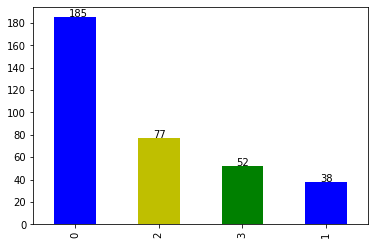

In [19]:
ax = df.DegradomeCategory.value_counts().plot(kind='bar',color=['b','y','g'])
x_offset = -0.07
y_offset = 0.15
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))


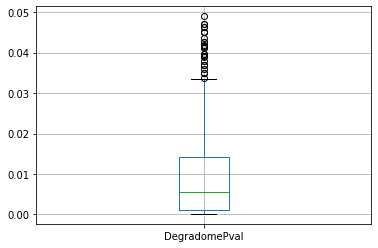

In [20]:
df.boxplot(column=['DegradomePval'])


In [21]:
print(len(df[df.DegradomePval < 0.05].index))

352


In [22]:
df.Transcript.nunique()

227

In [23]:
df['gene'] =  df.Transcript.str.split('.').str[0]

In [24]:
df.head(2)

,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,gene
0,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,0.0,-1.0,1,21,564,584,UCCACAGGCUUUCUUGAACUG,: :::::::::::::::::::,CCGUUCAAGAAAGCCUGUGGA,Cleavage,cdna chromosome:IWGSC:6B:481089083:481090143:-...,1,TraesCS6B02G267500.1:575,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,564,584,575,-37.4,-35.4,0.946524,2.0,"1-19,584-566","20-21,565-564[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CCGUUCAAGAAAGCCUGUGGA&UCCACAGGCUUUCUUGAACUG,0,0.000393,../data/res/sun_plots/SRR1197126/mrcv_all_Clus...,SRR1197126_seedling_leaf,TraesCS6B02G267500
1,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,0.0,-1.0,1,21,564,584,UCCACAGGCUUUCUUGAACUG,: :::::::::::::::::::,CCGUUCAAGAAAGCCUGUGGA,Cleavage,cdna chromosome:IWGSC:6B:481089083:481090143:-...,1,TraesCS6B02G267500.1:575,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,564,584,575,-37.4,-35.4,0.946524,2.0,"1-19,584-566","20-21,565-564[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CCGUUCAAGAAAGCCUGUGGA&UCCACAGGCUUUCUUGAACUG,3,0.004493,../data/res/sun_plots/SRR1197127/mrcv_all_Clus...,SRR1197127_seedling_root,TraesCS6B02G267500


In [25]:
df.gene.nunique()

198

In [26]:
df.Query.nunique()

93

In [26]:
transcripts = set()
for k,v in df.iterrows():
    transcript = v.Transcript
    transcripts.add(transcript)

In [27]:
fasta_seq = SeqIO.parse(path_transcripts, 'fasta')


In [28]:
lens = {}
buffer_seqs = []
for record in fasta_seq:
    if record.id in transcripts:
        buffer_seqs.append(record)
        clean_seq = ''.join(str(record.seq).splitlines())
        lens[record.id] = len(clean_seq)
SeqIO.write(buffer_seqs, path_transcripts_res, "fasta")
print(len(buffer_seqs))
print(path_transcripts_res)

227
../data/res/targets.fa


In [29]:
path_blast_res

'../data/res/transcripts_mites.csv'

In [30]:
df_mites = pd.read_csv(path_blast_res, sep="\t")
cols = ['qseqid','sseqid','qstart','qend','sstart','send','mismatch','gaps','pident','evalue','length','qlen','slen','qcovs','score']
df_mites.columns = cols

df_mites = df_mites[df_mites.pident >= 80]
df_mites = df_mites[(df_mites.length / df_mites.qlen) >= 0.8]

print(len(df_mites.index))
df_mites.head(2)

636


,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs,score
17,DTT_Taes_Athos_42j2-4,TraesCS1B02G479800.1,1,81,3394,3474,5,0,93.827,1.580000e-30,81,81,3785,100,137
18,DTT_Taes_Athos_42j2-4,TraesCS1B02G479800.1,1,81,3474,3394,10,0,87.654,5.160000e-24,81,81,3785,100,112


In [31]:
df['new_start'] = df[['TStart','TStop']].min(axis=1)
df['new_end'] = df[['TStart','TStop']].max(axis=1)
df['TStart'] = df['new_start']
df['TStop'] = df['new_end']
df = df.drop('new_start',axis=1).drop('new_end',axis=1)


In [32]:
df_mites['new_start'] = df_mites[['sstart','send']].min(axis=1)
df_mites['new_end'] = df_mites[['sstart','send']].max(axis=1)
df_mites['sstart'] = df_mites['new_start']
df_mites['send'] = df_mites['new_end']
df_mites = df_mites.drop('new_start',axis=1).drop('new_end',axis=1)


In [33]:
df_mites.head(4)

,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs,score
17,DTT_Taes_Athos_42j2-4,TraesCS1B02G479800.1,1,81,3394,3474,5,0,93.827,1.580000e-30,81,81,3785,100,137
18,DTT_Taes_Athos_42j2-4,TraesCS1B02G479800.1,1,81,3394,3474,10,0,87.654,5.160000e-24,81,81,3785,100,112
19,DTT_Taes_Athos_42j2-4,TraesCS6B02G168300.1,1,81,1142,1222,6,0,92.593,1.920000e-29,81,81,1610,100,132
20,DTT_Taes_Athos_42j2-4,TraesCS6B02G168300.1,1,81,1142,1222,14,0,82.716,1.380000e-18,81,81,1610,100,92


In [34]:
df_mites = df_mites.drop_duplicates()


In [35]:
print(len(df_mites.index))
df_mites.head(8)

612


,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs,score
17,DTT_Taes_Athos_42j2-4,TraesCS1B02G479800.1,1,81,3394,3474,5,0,93.827,1.580000e-30,81,81,3785,100,137
18,DTT_Taes_Athos_42j2-4,TraesCS1B02G479800.1,1,81,3394,3474,10,0,87.654,5.160000e-24,81,81,3785,100,112
19,DTT_Taes_Athos_42j2-4,TraesCS6B02G168300.1,1,81,1142,1222,6,0,92.593,1.920000e-29,81,81,1610,100,132
20,DTT_Taes_Athos_42j2-4,TraesCS6B02G168300.1,1,81,1142,1222,14,0,82.716,1.380000e-18,81,81,1610,100,92
21,DTT_Taes_Athos_42j2-4,TraesCS3A02G274100.1,1,81,1077,1157,6,0,92.593,1.920000e-29,81,81,1296,100,132
22,DTT_Taes_Athos_42j2-4,TraesCS3A02G274100.1,1,81,1077,1157,9,0,88.889,4.240000e-25,81,81,1296,100,117
23,DTT_Taes_Athos_42j2-4,TraesCS6A02G276700.1,1,81,3094,3174,6,0,92.593,1.920000e-29,81,81,3296,100,132
24,DTT_Taes_Athos_42j2-4,TraesCS6A02G276700.1,1,81,3094,3174,8,0,90.123,9.960000e-27,81,81,3296,100,122


In [36]:
#c_maxes = df_mites.groupby(['qseqid', 'sseqid']).score.transform(max)
#df_mites = df_mites.loc[df_mites.score == c_maxes]


In [37]:
df_mites.head(4)

,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs,score
17,DTT_Taes_Athos_42j2-4,TraesCS1B02G479800.1,1,81,3394,3474,5,0,93.827,1.580000e-30,81,81,3785,100,137
18,DTT_Taes_Athos_42j2-4,TraesCS1B02G479800.1,1,81,3394,3474,10,0,87.654,5.160000e-24,81,81,3785,100,112
19,DTT_Taes_Athos_42j2-4,TraesCS6B02G168300.1,1,81,1142,1222,6,0,92.593,1.920000e-29,81,81,1610,100,132
20,DTT_Taes_Athos_42j2-4,TraesCS6B02G168300.1,1,81,1142,1222,14,0,82.716,1.380000e-18,81,81,1610,100,92


In [38]:
df['MITE_target'] = None

In [39]:
df.head(1)

,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE_target
0,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,0.0,-1.0,1,21,564,584,UCCACAGGCUUUCUUGAACUG,: :::::::::::::::::::,CCGUUCAAGAAAGCCUGUGGA,Cleavage,cdna chromosome:IWGSC:6B:481089083:481090143:-...,1,TraesCS6B02G267500.1:575,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,564,584,575,-37.4,-35.4,0.946524,2.0,"1-19,584-566","20-21,565-564[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CCGUUCAAGAAAGCCUGUGGA&UCCACAGGCUUUCUUGAACUG,0,0.000393,../data/res/sun_plots/SRR1197126/mrcv_all_Clus...,SRR1197126_seedling_leaf,None


In [40]:
for k,v in df.iterrows():
    start = v.TStart
    end = v.TStop
    transcript = v.Transcript
    
    df_filter = df_mites[df_mites.qseqid.str.contains('DTT')]
    df_filter = df_filter[df_filter.sseqid==transcript]
    df_filter = df_filter[(df_filter.sstart <= start) & (df_filter.send >= end)]
    if len(df_filter.index) > 0:
        #print(k, transcript,df_filter.loc[df_filter['score'].idxmax()].qseqid)
        df.loc[df['Transcript'] == transcript, ['MITE_target']] = df_filter.loc[df_filter['score'].idxmax()].qseqid
    else:
        df_filter = df_mites[df_mites.qseqid.str.contains('MITE_')]
        df_filter = df_filter[df_filter.sseqid==transcript]
        df_filter = df_filter[(df_filter.sstart <= start) & (df_filter.send >= end)]
        if len(df_filter.index) > 0:
            #print(k,transcript,df_filter.loc[df_filter['score'].idxmax()].qseqid)
            df.loc[df['Transcript'] == transcript, ['MITE_target']] = df_filter.loc[df_filter['score'].idxmax()].qseqid
        

In [41]:
len(df[(df.DegradomePval < 0.05) & (df['MITE_target'].notnull())].index)

33

In [42]:
df_mites.to_csv(path_blast_res_filtered,sep='\t', index=None)
path_blast_res_filtered

'../data/res/transcripts_mites.filtered.csv'

In [43]:
total = len(df.index)
w_mites = len(df[df.MITE_target.notnull()].index)
w_o_mites = len(df[df.MITE_target.isnull()].index)
print('Total', total)
print('W mites', w_mites)
print('WO mites', w_o_mites)
print(w_mites * 100 / total)

Total 352
W mites 33
WO mites 319
9.375


In [44]:
#add annotations
path_annotation = '../data/Triticum_aestivum.IWGSC.48.gff3'


In [45]:
df_ann = pd.read_csv(path_annotation, index_col=False, sep='\t', comment='#', header=None)
df_ann.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print(len(df_ann.index))

1957744


In [46]:
df_ann.head(1)

,seqname,source,feature,start,end,score,strand,frame,attribute
0,1A,IWGSC,chromosome,1,594102056,.,.,.,"ID=chromosome:1A;Alias=chr1A,LS992080.1"


In [47]:
df_ann['feature_len'] = abs(df_ann['start'] - df_ann['end'])


In [48]:
df_ann = df_ann[
    (df_ann.feature == 'three_prime_UTR') | 
    (df_ann.feature == 'five_prime_UTR')]
print(len(df_ann.index))


216091


In [49]:
df_ann = df_ann.reset_index(drop=True)


In [50]:
#adds transcript name
df_ann['transcript'] = df_ann['attribute'].str.split('transcript:').str[1]
df_ann['transcript'] = df_ann['transcript'].str.split(';').str[0]

In [51]:
df_ann.head(5)

,seqname,source,feature,start,end,score,strand,frame,attribute,feature_len,transcript
0,1A,IWGSC,three_prime_UTR,40098,40731,.,-,.,Parent=transcript:TraesCS1A02G000100.1,633,TraesCS1A02G000100.1
1,1A,IWGSC,three_prime_UTR,58474,58507,.,-,.,Parent=transcript:TraesCS1A02G000100.1,33,TraesCS1A02G000100.1
2,1A,IWGSC,five_prime_UTR,58769,58897,.,-,.,Parent=transcript:TraesCS1A02G000100.1,128,TraesCS1A02G000100.1
3,1A,IWGSC,five_prime_UTR,70089,70338,.,-,.,Parent=transcript:TraesCS1A02G000100.1,249,TraesCS1A02G000100.1
4,1A,IWGSC,three_prime_UTR,70557,70650,.,+,.,Parent=transcript:TraesCS1A02G000200.1,93,TraesCS1A02G000200.1


In [52]:
#remove duplicated
indexes = df_ann[(df_ann.strand=='+') & (df_ann.feature=='five_prime_UTR')].duplicated(['feature','transcript'],keep='first')
indexes = indexes[indexes == True].index
df_ann = df_ann[~df_ann.index.isin(indexes)]

indexes = df_ann[(df_ann.strand=='-') & (df_ann.feature=='five_prime_UTR')].duplicated(['feature','transcript'],keep='last')
indexes = indexes[indexes == True].index
df_ann = df_ann[~df_ann.index.isin(indexes)]


indexes = df_ann[(df_ann.strand=='+') & (df_ann.feature=='three_prime_UTR')].duplicated(['feature','transcript'],keep='last')
indexes = indexes[indexes == True].index
df_ann = df_ann[~df_ann.index.isin(indexes)]

indexes = df_ann[(df_ann.strand=='-') & (df_ann.feature=='three_prime_UTR')].duplicated(['feature','transcript'],keep='first')
indexes = indexes[indexes == True].index
df_ann = df_ann[~df_ann.index.isin(indexes)]



In [53]:
print(len(df_ann.index))
df_ann.head(5)

180799


,seqname,source,feature,start,end,score,strand,frame,attribute,feature_len,transcript
0,1A,IWGSC,three_prime_UTR,40098,40731,.,-,.,Parent=transcript:TraesCS1A02G000100.1,633,TraesCS1A02G000100.1
3,1A,IWGSC,five_prime_UTR,70089,70338,.,-,.,Parent=transcript:TraesCS1A02G000100.1,249,TraesCS1A02G000100.1
5,1A,IWGSC,three_prime_UTR,88242,89245,.,+,.,Parent=transcript:TraesCS1A02G000200.1,1003,TraesCS1A02G000200.1
6,1A,IWGSC,five_prime_UTR,95906,96020,.,+,.,Parent=transcript:TraesCS1A02G000300.1,114,TraesCS1A02G000300.1
8,1A,IWGSC,five_prime_UTR,102794,104077,.,+,.,Parent=transcript:TraesCS1A02G000400.1,1283,TraesCS1A02G000400.1


In [54]:
df['annotation_target'] = 'exon'

In [56]:
"""for k,v in df.iterrows():
    transcript_start = v.TStart
    transcript_stop = v.TStop
    transcript_slice = v.TSlice
    transcript_name = v.Transcript
    transcript_len = lens[transcript_name]
    other = df_ann[df_ann.transcript == transcript_name]
    for k2,v2 in other.iterrows():
        if v2.feature == 'five_prime_UTR' and v2.strand == '+' and transcript_slice <= v2.feature_len:
             df.loc[k, 'annotation_target'] = 'five_prime_UTR'
        if v2.feature == 'five_prime_UTR' and v2.strand == '-' and transcript_len - transcript_slice <= v2.feature_len:
             df.loc[k, 'annotation_target'] = 'five_prime_UTR'
        if v2.feature == 'three_prime_UTR' and v2.strand == '+' and transcript_slice >= transcript_len - v2.feature_len:
             df.loc[k, 'annotation_target'] = 'three_prime_UTR'
        if v2.feature == 'three_prime_UTR' and v2.strand == '-' and transcript_slice <= v2.feature_len:
             df.loc[k, 'annotation_target'] = 'three_prime_UTR'
"""

"for k,v in df.iterrows():\n    transcript_start = v.TStart\n    transcript_stop = v.TStop\n    transcript_slice = v.TSlice\n    transcript_name = v.Transcript\n    transcript_len = lens[transcript_name]\n    other = df_ann[df_ann.transcript == transcript_name]\n    for k2,v2 in other.iterrows():\n        if v2.feature == 'five_prime_UTR' and v2.strand == '+' and transcript_slice <= v2.feature_len:\n             df.loc[k, 'annotation_target'] = 'five_prime_UTR'\n        if v2.feature == 'five_prime_UTR' and v2.strand == '-' and transcript_len - transcript_slice <= v2.feature_len:\n             df.loc[k, 'annotation_target'] = 'five_prime_UTR'\n        if v2.feature == 'three_prime_UTR' and v2.strand == '+' and transcript_slice >= transcript_len - v2.feature_len:\n             df.loc[k, 'annotation_target'] = 'three_prime_UTR'\n        if v2.feature == 'three_prime_UTR' and v2.strand == '-' and transcript_slice <= v2.feature_len:\n             df.loc[k, 'annotation_target'] = 'three_pri

In [55]:
for k,v in df.iterrows():
    transcript_start = v.TStart
    transcript_stop = v.TStop
    transcript_slice = v.TSlice
    transcript_name = v.Transcript
    transcript_len = lens[transcript_name]
    other = df_ann[df_ann.transcript == transcript_name]
    for k2,v2 in other.iterrows():
        if v2.feature == 'five_prime_UTR' and transcript_slice <= v2.feature_len:
             df.loc[k, 'annotation_target'] = 'five_prime_UTR'
        if v2.feature == 'three_prime_UTR' and transcript_slice >= transcript_len - v2.feature_len:
             df.loc[k, 'annotation_target'] = 'three_prime_UTR'


In [56]:
df_ann[df_ann.transcript=='TraesCS5B02G218100.1']

,seqname,source,feature,start,end,score,strand,frame,attribute,feature_len,transcript
138372,5B,IWGSC,three_prime_UTR,391827272,391827751,.,-,.,Parent=transcript:TraesCS5B02G218100.1,479,TraesCS5B02G218100.1
138374,5B,IWGSC,five_prime_UTR,391830723,391830741,.,-,.,Parent=transcript:TraesCS5B02G218100.1,18,TraesCS5B02G218100.1


In [59]:
#manually annotate bogus annotation gene
df[df['Target_Acc.'] == 'TraesCS5B02G218100.1']#['annotation_target']
df.loc[df['Target_Acc.'] == 'TraesCS5B02G218100.1', 'annotation_target'] = 'three_prime_UTR'

In [60]:
df[df['Target_Acc.'] == 'TraesCS5B02G218100.1']#['annotation_target']


,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,gene,MITE_target,annotation_target
166,sun_all_Cluster_8835_1B_161992200_161992280,TraesCS5B02G218100.1,1.0,-1.0,1,21,1553,1573,UCUGUUCACAAAUGUAAGACG,: :::::.::::::::::.::,CAUCUUAUAUUUGUGAACGGA,Cleavage,cdna chromosome:IWGSC:5B:391827272:391830741:-...,1,TraesCS5B02G218100.1:1564,sun_all_Cluster_8835_1B_161992200_161992280,TraesCS5B02G218100.1,1553,1573,1564,-32.4,-26.1,0.805556,3.5,"1-19,1573-1555","20-21,1554-1553[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CAUCUUAUAUUUGUGAACGGA&UCUGUUCACAAAUGUAAGACG,3,0.022754,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo,TraesCS5B02G218100,DTT_Hvul_Oleus_AF490468-1,three_prime_UTR
167,sun_all_Cluster_8835_1B_161992200_161992280,TraesCS5B02G218100.1,1.0,-1.0,1,21,1553,1573,UCUGUUCACAAAUGUAAGACG,: :::::.::::::::::.::,CAUCUUAUAUUUGUGAACGGA,Cleavage,cdna chromosome:IWGSC:5B:391827272:391830741:-...,1,TraesCS5B02G218100.1:1564,sun_all_Cluster_8835_1B_161992200_161992280,TraesCS5B02G218100.1,1553,1573,1564,-32.4,-26.1,0.805556,3.5,"1-19,1573-1555","20-21,1554-1553[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CAUCUUAUAUUUGUGAACGGA&UCUGUUCACAAAUGUAAGACG,0,0.002596,../data/res/sun_plots/SRR1197128/sun_all_Clust...,SRR1197128_grain_8_days_after_pollination,TraesCS5B02G218100,DTT_Hvul_Oleus_AF490468-1,three_prime_UTR


In [61]:
df.head(2)

,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,gene,MITE_target,annotation_target
0,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,0.0,-1.0,1,21,564,584,UCCACAGGCUUUCUUGAACUG,: :::::::::::::::::::,CCGUUCAAGAAAGCCUGUGGA,Cleavage,cdna chromosome:IWGSC:6B:481089083:481090143:-...,1,TraesCS6B02G267500.1:575,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,564,584,575,-37.4,-35.4,0.946524,2.0,"1-19,584-566","20-21,565-564[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CCGUUCAAGAAAGCCUGUGGA&UCCACAGGCUUUCUUGAACUG,0,0.000393,../data/res/sun_plots/SRR1197126/mrcv_all_Clus...,SRR1197126_seedling_leaf,TraesCS6B02G267500,None,exon
1,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,0.0,-1.0,1,21,564,584,UCCACAGGCUUUCUUGAACUG,: :::::::::::::::::::,CCGUUCAAGAAAGCCUGUGGA,Cleavage,cdna chromosome:IWGSC:6B:481089083:481090143:-...,1,TraesCS6B02G267500.1:575,mrcv_all_Cluster_10948_2D_629186111_629186240,TraesCS6B02G267500.1,564,584,575,-37.4,-35.4,0.946524,2.0,"1-19,584-566","20-21,565-564[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CCGUUCAAGAAAGCCUGUGGA&UCCACAGGCUUUCUUGAACUG,3,0.004493,../data/res/sun_plots/SRR1197127/mrcv_all_Clus...,SRR1197127_seedling_root,TraesCS6B02G267500,None,exon


In [57]:
df['annotation_target'].fillna('exon', inplace=True)

In [58]:
df['annotation_target'].replace('', 'exon',inplace=True)

In [59]:
df[['SiteID','annotation_target']].head(10)

,SiteID,annotation_target
0,TraesCS6B02G267500.1:575,exon
1,TraesCS6B02G267500.1:575,exon
2,TraesCS7A02G049100.2:215,exon
3,TraesCS7A02G049100.2:215,exon
4,TraesCS7D02G044200.1:443,exon
5,TraesCS7D02G166400.1:488,exon
6,TraesCS6D02G245300.1:628,exon
7,TraesCS2D02G435200.1:673,exon
8,TraesCS2A02G435100.1:734,exon
9,TraesCS2A02G435100.1:734,exon


In [60]:
df['annotation_target'].value_counts()

exon               233
three_prime_UTR    115
five_prime_UTR       4
Name: annotation_target, dtype: int64

In [61]:
df[df.MITE_target.notnull()]['annotation_target'].value_counts()

three_prime_UTR    31
exon                2
Name: annotation_target, dtype: int64

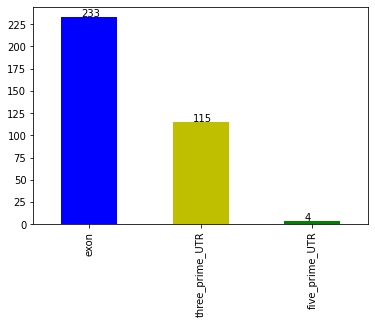

In [62]:
ax = df.annotation_target.value_counts().plot(kind='bar',color=['b','y','g'])
x_offset = -0.07
y_offset = 0.15
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
ax
plt.savefig('../data/res/targets.png',transparent=True, bbox_inches='tight', pad_inches=0)

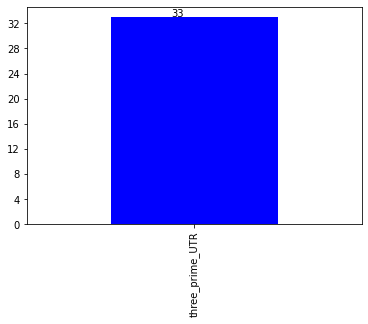

In [68]:
ax = df[df.MITE_target.notnull()].annotation_target.value_counts().plot(kind='bar',color=['b','y','g'])

x_offset = -0.07
y_offset = 0.15
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
ax
plt.savefig('../data/res/targets_mites.png',transparent=True, bbox_inches='tight', pad_inches=0)


In [63]:
df.lib.value_counts()

SRR1197126_seedling_leaf                     126
SRR1197127_seedling_root                     117
SRR1197125_germinating_seed_embryo            79
SRR1197128_grain_8_days_after_pollination     30
Name: lib, dtype: int64

In [64]:
df.to_csv(path_res_target, index=None)
path_res_target

'../data/res/res_target.csv'

In [65]:
# filter same target with same library 
print(len(df.index))
idx = df.groupby(['Query','Transcript','TStart','TStop'])['DegradomePval'].transform(min) == df['DegradomePval']
print(len(df[idx].index))
df = df[idx]

352
277


In [66]:
df_mirna_res = pd.read_csv(path_mirna_res, sep='\t')
print(len(df_mirna_res.index))
df_mirna_res.head(2)

270


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,Complexity,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,seqname,position,start,end,MITE,mirbase,annotation,NEW_NAME,genes
0,1A:117385432-117385825,sun_mites_MITE_T_430_1A_117385432_117385825,394,17,0.135,3,0.941,+,UCUGCACCCUGAAUGAUGAAUAGU,11,0.412,24,Y,-1.0,1,0,0,1,0,1,14,1A,117385432-117385825,117385432,117385825,MITE_524,NaN,intergenic,miRNA_MITE_1,NaN
1,1A:169645857-169646029,mrcv_mites_MITE_T_62663_1A_169645857_169646029,173,16,0.126,3,1.000,+,UAGAGAUUUCAAAUGGAACAC,7,0.500,21,Y,-1.0,0,2,2,9,0,0,3,1A,169645857-169646029,169645857,169646029,DTT_Tdur_Thalos_103H9-1,NaN,intron,miRNA_MITE_2,TraesCS1A02G130800.1


In [67]:
df_mirna_res['MajorRNA_len'] = df_mirna_res['MajorRNA'].str.len()
df_mirna_res.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,Complexity,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,seqname,position,start,end,MITE,mirbase,annotation,NEW_NAME,genes,MajorRNA_len
0,1A:117385432-117385825,sun_mites_MITE_T_430_1A_117385432_117385825,394,17,0.135,3,0.941,+,UCUGCACCCUGAAUGAUGAAUAGU,11,0.412,24,Y,-1.0,1,0,0,1,0,1,14,1A,117385432-117385825,117385432,117385825,MITE_524,NaN,intergenic,miRNA_MITE_1,NaN,24
1,1A:169645857-169646029,mrcv_mites_MITE_T_62663_1A_169645857_169646029,173,16,0.126,3,1.000,+,UAGAGAUUUCAAAUGGAACAC,7,0.500,21,Y,-1.0,0,2,2,9,0,0,3,1A,169645857-169646029,169645857,169646029,DTT_Tdur_Thalos_103H9-1,NaN,intron,miRNA_MITE_2,TraesCS1A02G130800.1,21


In [68]:
 df_mirna_res.groupby('DicerCall').count()['Name']

DicerCall
20     18
21    175
22     35
23      7
24     35
Name: Name, dtype: int64

In [69]:
 df_mirna_res.groupby('MajorRNA_len').count()['Name']

MajorRNA_len
20     19
21    172
22     36
23      8
24     35
Name: Name, dtype: int64

In [70]:
#df_merge = pd.merge(df_mirna_res[df_mirna_res.MITE.notnull()],df[df.MITE.notnull()],left_on='Name', right_on='Query')
df_merge = pd.merge(df_mirna_res,df,left_on='Name', right_on='Query')
print(len(df_merge.index))

277


In [71]:
df_merge.head(1)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,Complexity,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,seqname,position,start,end,MITE,mirbase,annotation,NEW_NAME,genes,MajorRNA_len,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE_target,annotation_target
0,1A:492271831-492271941,sun_all_Cluster_4365_1A_492271831_492271941,111,441,3.492,2,1.0,+,GAGGAGGAGGAGCAGGACAAG,336,0.043,21,Y,-1.0,9,0,70,360,1,1,0,1A,492271831-492271941,492271831,492271941,NaN,NaN,exon,NaN,TraesCS1A02G297400.1,21,sun_all_Cluster_4365_1A_492271831_492271941,TraesCS5D02G334900.1,1.5,-1.0,1,21,174,194,GAGGAGGAGGAGCAGGACAAG,.: ::::::::.:::::::::,UUGGUCCUGCUUCUCCUCCUC,Cleavage,cdna chromosome:IWGSC:5D:424223039:424223784:-...,1,TraesCS5D02G334900.1:185,sun_all_Cluster_4365_1A_492271831_492271941,TraesCS5D02G334900.1,174,194,185,-44.4,-39.2,0.882883,4.0,"1-18,194-177","19-21,176-174[UP3]",...((((((((((((((((((&))))))))))))))))))...,UUGGUCCUGCUUCUCCUCCUC&GAGGAGGAGGAGCAGGACAAG,2,0.033678,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo,None,exon


In [72]:
df_merge.to_csv(path_res_final, index=None)
path_res_final

'../data/res/res_prod_target.csv'

In [73]:
df_merge[df_merge['MITE'].notnull()].to_csv(path_res_prod_mite_target_all, index=None)
print(path_res_prod_mite_target_all)
print(len(df_merge[df_merge['MITE'].notnull()].index))
df_merge[df_merge['MITE'].notnull()].head(2)

../data/res/res_prod_mites_target_all.csv
36


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,Complexity,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,seqname,position,start,end,MITE,mirbase,annotation,NEW_NAME,genes,MajorRNA_len,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE_target,annotation_target
2,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,0.074,21,Y,-1.0,0,1,0,132,0,0,2,1B,161992200-161992280,161992200,161992280,MITE_1125,hvu-miR6197,intron,miRNA_MITE_3,TraesCS1B02G130500.1,21,sun_all_Cluster_8835_1B_161992200_161992280,TraesCS5B02G218100.1,1.0,-1.0,1,21,1553,1573,UCUGUUCACAAAUGUAAGACG,: :::::.::::::::::.::,CAUCUUAUAUUUGUGAACGGA,Cleavage,cdna chromosome:IWGSC:5B:391827272:391830741:-...,1,TraesCS5B02G218100.1:1564,sun_all_Cluster_8835_1B_161992200_161992280,TraesCS5B02G218100.1,1553,1573,1564,-32.4,-26.1,0.805556,3.5,"1-19,1573-1555","20-21,1554-1553[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CAUCUUAUAUUUGUGAACGGA&UCUGUUCACAAAUGUAAGACG,0,0.002596,../data/res/sun_plots/SRR1197128/sun_all_Clust...,SRR1197128_grain_8_days_after_pollination,DTT_Hvul_Oleus_AF490468-1,exon
5,2A:133702671-133702770,sun_mites_MITE_T_99232_2A_133702671_133702770,100,2289,18.126,2181,0.983,+,UGAGACGGGUAAUUUGGAACGGAG,1484,0.047,24,Y,-1.0,29,17,29,59,53,101,2001,2A,133702671-133702770,133702671,133702770,DTT_Tmon_Icarus_BG607724-1,NaN,promoter,miRNA_MITE_5,TraesCS2A02G175300,24,sun_mites_MITE_T_99232_2A_133702671_133702770,TraesCS7B02G175300.2,2.5,-1.0,1,24,1502,1525,UGAGACGGGUAAUUUGGAACGGAG,::::::::::::::::.:::: .:,CUCCGUUCCAAAUUACUCGUCGUA,Cleavage,cdna chromosome:IWGSC:7B:246505474:246508663:-...,1,TraesCS7B02G175300.2:1516,sun_mites_MITE_T_99232_2A_133702671_133702770,TraesCS7B02G175300.2,1502,1525,1516,-44.0,-37.1,0.843182,4.0,"1-2,1525-1524;4-24,1522-1502","3-3,1523-1523[SIL]",(((((((((((((((((((((.((&)).))))))))))))))))))))),CUCCGUUCCAAAUUACUCGUCGUA&UGAGACGGGUAAUUUGGAACGGAG,2,0.044973,../data/res/sun_plots/SRR1197128/sun_mites_MIT...,SRR1197128_grain_8_days_after_pollination,None,three_prime_UTR


In [ ]:
df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].notnull()]

In [75]:
#micros = set(df_merge[df_merge['MITE'].notnull()]['Name'].tolist())
x = df_merge.sort_values('MITE')['NEW_NAME'].tolist()

micros = sorted(set(x), key=x.index)
micros_t = {}
index = 1
for m in micros:
    micros_t[index] = m
    index += 1


In [76]:
mirna_names = []
mirna_names_2 = []
for x in micros_t.values():
    if 'miRNA' in x:
        mirna_names.append(x)
    else:
        mirna_names_2.append(x)

TypeError: argument of type 'float' is not iterable

In [103]:
#print(len(df_merge[df_merge['MITE'].notnull()].index))
#df_merge[df_merge['MITE'].notnull()]

In [104]:
df_merge['NEW_NAME'].fillna(df_merge['#Locus'], inplace=True)

In [105]:
mirna_names = sorted(mirna_names, key=lambda item: (int(item.split('_')[2])))

In [106]:

rest = mirna_names + sorted(mirna_names_2)

In [107]:
sorterIndex = dict(zip(rest, range(len(rest))))
df_merge['sort'] =df_merge['NEW_NAME'].map(sorterIndex)

df_merge.sort_values('sort', ascending=True, inplace=True)

In [108]:
#micros = set(df_merge[df_merge['MITE'].notnull()]['Name'].tolist())
x = df_merge.sort_values('sort')['NEW_NAME'].tolist()

micros = sorted(set(x), key=x.index)
micros_t = {}
index = 1
for m in micros:
    micros_t[index] = m
    index += 1

In [109]:
import math


In [110]:
#df_merge[df_merge['Name'] == 'mrcv_all_Cluster_19446_4B_613386213_613386366']
import numpy as np

In [111]:
mirna_names = []
mirna_names_2 = []
for x in micros_t.values():
#    name = '_'.join(name)
    if 'miRNA' in x:
        mirna_names.append(x)
    else:
        mirna_names_2.append(x)

In [112]:

mirna_names = sorted(mirna_names, key=lambda item: (int(item.split('_')[2])))


In [113]:
rest = mirna_names + sorted(mirna_names_2)

In [114]:
df_merge.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,Complexity,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,seqname,position,start,end,MITE,mirbase,annotation,NEW_NAME,genes,MajorRNA_len,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,gene,MITE_target,annotation_target,sort
2,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,0.074,21,Y,-1.0,0,1,0,132,0,0,2,1B,161992200-161992280,161992200,161992280,MITE_1125,hvu-miR6197,intron,miRNA_MITE_3,TraesCS1B02G130500.1,21,sun_all_Cluster_8835_1B_161992200_161992280,TraesCS5B02G218100.1,1.0,-1.0,1,21,1553,1573,UCUGUUCACAAAUGUAAGACG,: :::::.::::::::::.::,CAUCUUAUAUUUGUGAACGGA,Cleavage,cdna chromosome:IWGSC:5B:391827272:391830741:-...,1,TraesCS5B02G218100.1:1564,sun_all_Cluster_8835_1B_161992200_161992280,TraesCS5B02G218100.1,1553,1573,1564,-32.4,-26.1,0.805556,3.5,"1-19,1573-1555","20-21,1554-1553[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CAUCUUAUAUUUGUGAACGGA&UCUGUUCACAAAUGUAAGACG,0,0.002596,../data/res/sun_plots/SRR1197128/sun_all_Clust...,SRR1197128_grain_8_days_after_pollination,TraesCS5B02G218100,DTT_Hvul_Oleus_AF490468-1,three_prime_UTR,0
5,2A:133702671-133702770,sun_mites_MITE_T_99232_2A_133702671_133702770,100,2289,18.126,2181,0.983,+,UGAGACGGGUAAUUUGGAACGGAG,1484,0.047,24,Y,-1.0,29,17,29,59,53,101,2001,2A,133702671-133702770,133702671,133702770,DTT_Tmon_Icarus_BG607724-1,NaN,promoter,miRNA_MITE_5,TraesCS2A02G175300,24,sun_mites_MITE_T_99232_2A_133702671_133702770,TraesCS7B02G175300.2,2.5,-1.0,1,24,1502,1525,UGAGACGGGUAAUUUGGAACGGAG,::::::::::::::::.:::: .:,CUCCGUUCCAAAUUACUCGUCGUA,Cleavage,cdna chromosome:IWGSC:7B:246505474:246508663:-...,1,TraesCS7B02G175300.2:1516,sun_mites_MITE_T_99232_2A_133702671_133702770,TraesCS7B02G175300.2,1502,1525,1516,-44.0,-37.1,0.843182,4.0,"1-2,1525-1524;4-24,1522-1502","3-3,1523-1523[SIL]",(((((((((((((((((((((.((&)).))))))))))))))))))))),CUCCGUUCCAAAUUACUCGUCGUA&UGAGACGGGUAAUUUGGAACGGAG,2,0.044973,../data/res/sun_plots/SRR1197128/sun_mites_MIT...,SRR1197128_grain_8_days_after_pollination,TraesCS7B02G175300,None,three_prime_UTR,1


<ipython-input-118-d408fb49b369>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


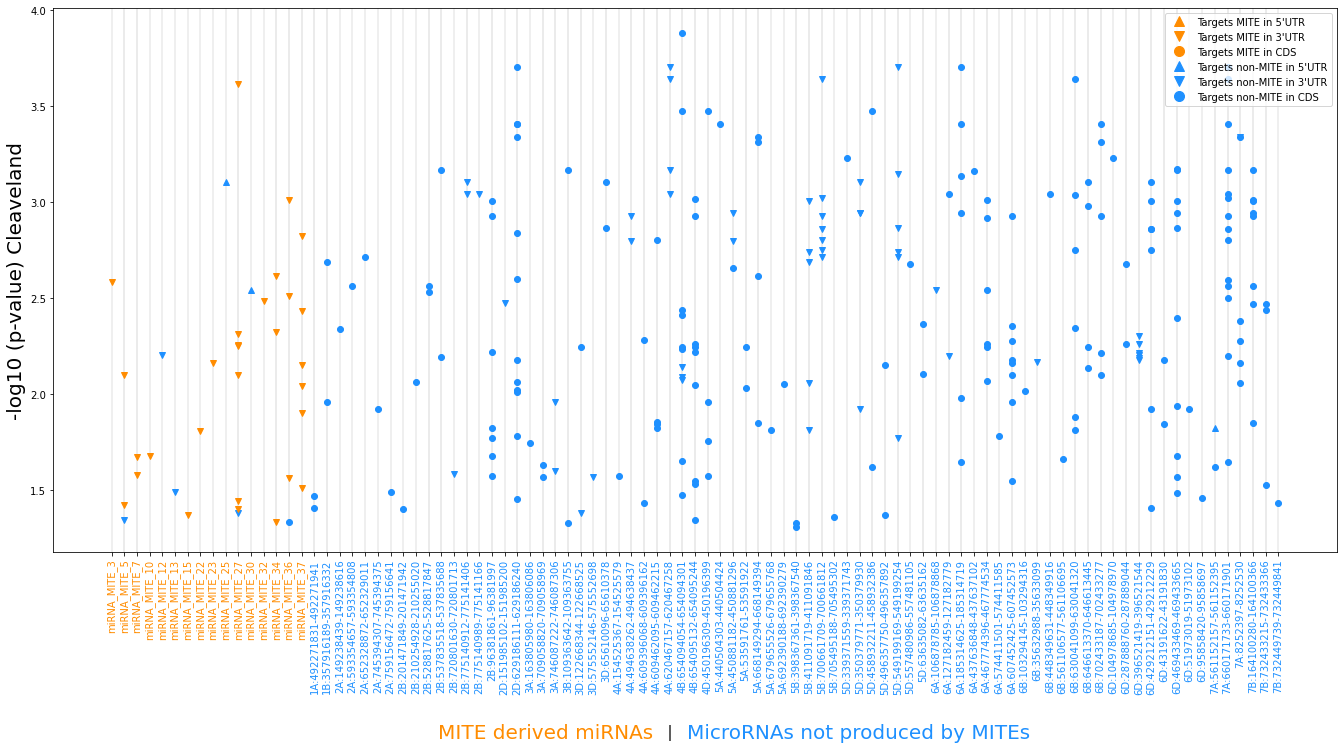

In [118]:
color1 = 'dodgerblue'
color2 = 'darkorange'

plt.figure()
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

plt.rcParams["figure.figsize"] = (23,10)
plt.xticks(list(micros_t.keys()),labels=rest,rotation=90)
plt.ylabel('-log10 (p-value) Cleaveland',size=20)
#plt.xlabel('microRNA: in blue produced by a MITE and red otherwise')

#fig = plt.figure()
ax = plt.subplot(111)

for i in plt.gca().get_xticklabels():
    micro = i.get_text()
    #print(micro)
    #print(str(df_merge[df_merge['NEW_NAME'].str.contains(micro)].iloc[0]['MITE']))
    if str(df_merge[df_merge['NEW_NAME'].str.contains(micro)].iloc[0]['MITE']) != "nan":
        i.set_color(color2)
    else:
        i.set_color(color1)
    
plotdata = []
#
for k,v in df_merge.sort_values('MITE').iterrows():

    res = list(micros_t.keys())[list(micros_t.values()).index(v['NEW_NAME'])]
    #print(res, v['NEW_NAME'])
    ax.axvline(x=res, color='#EBEBEB')


for k,v in df_merge.sort_values('sort').iterrows():

    res = list(micros_t.keys())[list(micros_t.values()).index(v['NEW_NAME'])]
    #print(res, v['NEW_NAME'])
#    plt.axvline(x=res, color='#EBEBEB')
    #print(v['NEW_NAME'],str(v['MITE_target']), v['DegradomePval'])
    #print(v)
    if str(v['MITE_target']) != 'None':
        color = color2
    else:
        color = color1
    if v['annotation_target'] == 'exon':
        marker = 'o'
    if v['annotation_target'] == 'five_prime_UTR':
        marker = '^'
    if v['annotation_target'] == 'three_prime_UTR':
        marker = 'v'
    #print(v['NEW_NAME'],str(v['MITE_target']), res, color, marker )
    ax.plot(res,math.log10(v['DegradomePval']) * -1 ,marker=marker, color=color)

    
    
#plt.title('MicroRNAS and its targets')



from matplotlib.patches import Patch
from matplotlib.lines import Line2D


legend_elements = [
    Line2D([0], [0],linestyle = 'None', marker='^', color=color2, label='Targets MITE in 5\'UTR',markerfacecolor=color2, markersize=10),
    Line2D([0], [0], linestyle = 'None',marker='v', color=color2, label= 'Targets MITE in 3\'UTR',markerfacecolor=color2, markersize=10),
    Line2D([0], [0], linestyle = 'None',marker='o', color=color2, label= 'Targets MITE in CDS',markerfacecolor=color2, markersize=10),
    Line2D([0], [0],linestyle = 'None', marker='^', color=color1, label='Targets non-MITE in 5\'UTR',markerfacecolor=color1, markersize=10),
    Line2D([0], [0],linestyle = 'None', marker='v', color=color1, label= 'Targets non-MITE in 3\'UTR',markerfacecolor=color1, markersize=10),
    Line2D([0], [0],linestyle = 'None', marker='o', color=color1, label= 'Targets non-MITE in CDS ',markerfacecolor=color1, markersize=10),
]

# Create the figure
ax.legend(handles=legend_elements, loc='upper right', )
#plt.show()


xbox1 = TextArea("MITE derived miRNAs", textprops=dict(color=color2, size=20))
xbox2 = TextArea("  |  ", textprops=dict(size=15))
xbox3 = TextArea("MicroRNAs not produced by MITEs", textprops=dict(color=color1, size=20))


xbox = HPacker(children=[xbox1, xbox2, xbox3],
                  align="center", pad=0, sep=5)

anchored_xbox = AnchoredOffsetbox(loc=3, child=xbox, pad=0., frameon=False,
                                      bbox_to_anchor=(0.3, -0.35),
                                      bbox_transform=ax.transAxes, borderpad=0.)

ax.add_artist(anchored_xbox)

plt.savefig('../data/targets.png',bbox_inches="tight")

In [116]:



 df_mirna_res.groupby('DicerCall').count()['Name']

DicerCall
20     18
21    175
22     35
23      7
24     35
Name: Name, dtype: int64

In [ ]:
rows = df_merge[df_merge['MITE'].notnull() ]
len(set(rows['Name'].tolist()))

In [ ]:
rows = df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].notnull()]
len(set(rows['Name'].tolist()))

In [ ]:
rows = df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].isnull()]
len(set(rows['Name'].tolist()))

In [ ]:
print(len(df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].notnull()].index))
df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].notnull() ]

In [ ]:
df_merge.head(1)

In [ ]:
df_merge['cleavage'] = '+'
df_merge['empty'] = ''
df_ = df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].notnull()]
df_ = df_[['NEW_NAME','Transcript','annotation_target','empty','DegradomeCategory','DegradomePval','empty','cleavage','MITE','MITE_target']]
df_['DegradomePval'] = df_['DegradomePval'].round(3)
df_['NEW_NAME'] = df_['NEW_NAME'].str.replace('_','\_')
df_['MITE_target'] = df_['MITE_target'].str.replace('_','\_')

df_['MITE'] = df_['MITE'].str.replace('_','\_')
df_['annotation_target'] = df_['annotation_target'].str.replace('three_prime_UTR','3\' UTR')
df_['annotation_target'] = df_['annotation_target'].str.replace('five_prime_UTR','5\' UTR')
df_['annotation_target'] = df_['annotation_target'].str.replace('exon','CDS')
df_['end'] = '\\\\'

df_.columns = ['miRNA name','Target transcript','Target annotation','empty','Category','p-value','empty','psRNA Target Cleavage','MITE in production','MITE in target','end']


df_.to_csv('../data/res/latex_2.csv', sep='&', index=None)
df_

In [ ]:
# some final numbers

In [ ]:
df.head(2)

In [84]:
df_merge.head(1)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,Complexity,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,seqname,position,start,end,MITE,mirbase,annotation,NEW_NAME,genes,MajorRNA_len,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,gene,MITE_target,annotation_target
0,1A:492271831-492271941,sun_all_Cluster_4365_1A_492271831_492271941,111,441,3.492,2,1.0,+,GAGGAGGAGGAGCAGGACAAG,336,0.043,21,Y,-1.0,9,0,70,360,1,1,0,1A,492271831-492271941,492271831,492271941,NaN,NaN,exon,1A:492271831-492271941,TraesCS1A02G297400.1,21,sun_all_Cluster_4365_1A_492271831_492271941,TraesCS5D02G334900.1,1.5,-1.0,1,21,174,194,GAGGAGGAGGAGCAGGACAAG,.: ::::::::.:::::::::,UUGGUCCUGCUUCUCCUCCUC,Cleavage,cdna chromosome:IWGSC:5D:424223039:424223784:-...,1,TraesCS5D02G334900.1:185,sun_all_Cluster_4365_1A_492271831_492271941,TraesCS5D02G334900.1,174,194,185,-44.4,-39.2,0.882883,4.0,"1-18,194-177","19-21,176-174[UP3]",...((((((((((((((((((&))))))))))))))))))...,UUGGUCCUGCUUCUCCUCCUC&GAGGAGGAGGAGCAGGACAAG,2,0.033678,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo,TraesCS5D02G334900,None,exon


In [85]:
print(">>>>Micros")
micros = len(df_merge['Name'].unique())
print(micros)

print(">>>>MITEs  en el sitio de produccion")
mites_prod_site = len(df_merge[df_merge['MITE'].notnull()]['Name'].unique())
print(mites_prod_site, int(mites_prod_site * 100 / micros ),'%')


print(">>>>sin MITE el sitio de produccion")
mites_prod_site = len(df_merge[df_merge['MITE'].isnull()]['Name'].unique())
print(mites_prod_site, int(mites_prod_site * 100 / micros ),'%')



print(">>>>sin MITE el sitio de produccion con mite en target")
mites_prod_site = len(df_merge[df_merge['MITE'].isnull() & df_merge['MITE_target'].notnull()]['Name'].unique())
print(mites_prod_site )


print(">>>>Micros con MITEs en el target")
mites_target_sites = len(df_merge[df_merge['MITE_target'].notnull()]['Name'].unique())
print(mites_target_sites,int(mites_target_sites * 100 / micros ),'%')


print(">>>>Micros sin MITEs en el target")
mites_target_sites = len(df_merge[df_merge['MITE_target'].isnull()]['Name'].unique())
print(mites_target_sites,int(mites_target_sites * 100 / micros ),'%')


print(">>>>>Micros con MITEs  en el sitio de produccion y en el target")
mites_target_prod = len(df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].notnull()]['Name'].unique())
print(mites_target_prod,'% del total de micros con mites en el sitio de prod:', mites_prod_site)

print(df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].notnull()].annotation_target.value_counts())

print(">MITEs  en el target, donde caen?")
print(df_merge[df_merge['MITE_target'].notnull()].annotation_target.value_counts())

print(">MITEs  en el sitio de produccion, donde caen?")
print(df_merge[df_merge['MITE'].notnull()].annotation_target.value_counts())


>>>>Micros
93
>>>>MITEs  en el sitio de produccion
16 17 %
>>>>sin MITE el sitio de produccion
77 82 %
>>>>sin MITE el sitio de produccion con mite en target
0
>>>>Micros con MITEs en el target
12 12 %
>>>>Micros sin MITEs en el target
84 90 %
>>>>>Micros con MITEs  en el sitio de produccion y en el target
12 % del total de micros con mites en el sitio de prod: 0
three_prime_UTR    29
Name: annotation_target, dtype: int64
>MITEs  en el target, donde caen?
three_prime_UTR    29
Name: annotation_target, dtype: int64
>MITEs  en el sitio de produccion, donde caen?
three_prime_UTR    33
five_prime_UTR      2
exon                1
Name: annotation_target, dtype: int64


In [86]:
df_merge.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,Complexity,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,seqname,position,start,end,MITE,mirbase,annotation,NEW_NAME,genes,MajorRNA_len,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,gene,MITE_target,annotation_target
0,1A:492271831-492271941,sun_all_Cluster_4365_1A_492271831_492271941,111,441,3.492,2,1.0,+,GAGGAGGAGGAGCAGGACAAG,336,0.043,21,Y,-1.0,9,0,70,360,1,1,0,1A,492271831-492271941,492271831,492271941,NaN,NaN,exon,1A:492271831-492271941,TraesCS1A02G297400.1,21,sun_all_Cluster_4365_1A_492271831_492271941,TraesCS5D02G334900.1,1.5,-1.0,1,21,174,194,GAGGAGGAGGAGCAGGACAAG,.: ::::::::.:::::::::,UUGGUCCUGCUUCUCCUCCUC,Cleavage,cdna chromosome:IWGSC:5D:424223039:424223784:-...,1,TraesCS5D02G334900.1:185,sun_all_Cluster_4365_1A_492271831_492271941,TraesCS5D02G334900.1,174,194,185,-44.4,-39.2,0.882883,4.0,"1-18,194-177","19-21,176-174[UP3]",...((((((((((((((((((&))))))))))))))))))...,UUGGUCCUGCUUCUCCUCCUC&GAGGAGGAGGAGCAGGACAAG,2,0.033678,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo,TraesCS5D02G334900,None,exon
1,1A:492271831-492271941,sun_all_Cluster_4365_1A_492271831_492271941,111,441,3.492,2,1.0,+,GAGGAGGAGGAGCAGGACAAG,336,0.043,21,Y,-1.0,9,0,70,360,1,1,0,1A,492271831-492271941,492271831,492271941,NaN,NaN,exon,1A:492271831-492271941,TraesCS1A02G297400.1,21,sun_all_Cluster_4365_1A_492271831_492271941,TraesCS5B02G329100.1,1.5,-1.0,1,21,34,54,GAGGAGGAGGAGCAGGACAAG,.: ::::::::.:::::::::,UUGGUCCUGCUUCUCCUCCUC,Cleavage,cdna chromosome:IWGSC:5B:513323706:513324058:-...,1,TraesCS5B02G329100.1:45,sun_all_Cluster_4365_1A_492271831_492271941,TraesCS5B02G329100.1,34,54,45,-44.4,-39.2,0.882883,4.0,"1-18,54-37","19-21,36-34[UP3]",...((((((((((((((((((&))))))))))))))))))...,UUGGUCCUGCUUCUCCUCCUC&GAGGAGGAGGAGCAGGACAAG,2,0.039179,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo,TraesCS5B02G329100,None,exon


In [87]:
print(">>>>Micros")
micros = len(df_merge['Name'].unique())
print(micros)

print(">>>>MITEs  en el sitio de produccion")
mites_prod_site = len(df_merge[df_merge['MITE'].notnull()]['Name'].unique())
print(mites_prod_site, int(mites_prod_site * 100 / micros ),'%')


print(">>>>>Micros con MITEs  en el sitio de produccion y en el target")
mites_target_prod = len(df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].notnull()]['Name'].unique())
print(mites_target_prod,'% del total de micros con mites en el sitio de prod:', mites_prod_site)


print(">>>>MITEs  en el sitio de produccion / total de targets")
res = len(df_merge[df_merge['MITE'].notnull()])
print(res)

print(">>>>MITEs  en el sitio de produccion / total de transcript targets")
res = len(df_merge[df_merge['MITE'].notnull()]['Target_Acc.'].unique())
print(res)



print(">>>>>Targets que salen de MITEs con MITE en el target")
res = len(df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].notnull()])
print(res)



print(">>>>>Targets que salen de MITEs sin MITE en el target")
res = len(df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].isnull()])
print(res)



>>>>Micros
93
>>>>MITEs  en el sitio de produccion
16 17 %
>>>>>Micros con MITEs  en el sitio de produccion y en el target
12 % del total de micros con mites en el sitio de prod: 16
>>>>MITEs  en el sitio de produccion / total de targets
36
>>>>MITEs  en el sitio de produccion / total de transcript targets
34
>>>>>Targets que salen de MITEs con MITE en el target
29
>>>>>Targets que salen de MITEs sin MITE en el target
7


In [88]:
df_merge[df_merge['MITE_target'].notnull()].groupby(['Name'])['annotation_target'].first()

Name
mrcv_all_Cluster_34208_7B_145795106_145795346      three_prime_UTR
mrcv_mites_MITE_T_100589_7A_668530082_668530159    three_prime_UTR
mrcv_mites_MITE_T_105526_3A_19302861_19302943      three_prime_UTR
mrcv_mites_MITE_T_121053_3D_508204974_508205052    three_prime_UTR
mrcv_mites_MITE_T_6223_6D_461512362_461512720      three_prime_UTR
mrcv_mites_MITE_T_80536_7B_34679825_34679952       three_prime_UTR
mrcv_mites_MITE_T_95924_5A_552632192_552632284     three_prime_UTR
mrcv_mites_MITE_T_96247_5D_156814986_156815098     three_prime_UTR
sun_all_Cluster_28681_2B_5671327_5671460           three_prime_UTR
sun_all_Cluster_8835_1B_161992200_161992280        three_prime_UTR
sun_mites_MITE_T_95036_5A_478013119_478013226      three_prime_UTR
sun_mites_MITE_T_99232_2A_133702671_133702770      three_prime_UTR
Name: annotation_target, dtype: object

In [ ]:
df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].notnull()]

In [ ]:
df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].notnull()]

In [ ]:
df_mites = df[df.MITE != '']
df[df.MITE != ''][['SiteID','Query','Transcript','TStart','TStop','MITE','Sequence']].head()

In [ ]:
df_mirna_res = pd.read_csv(path_mirna_res, sep='\t')
df_mirna_res.rename(columns={'MITE':'MITE_prod'}, inplace=True)
print(len(df_mirna_res.index))
df_mirna_res.head(2)

In [ ]:
df_mirna_res_mites = df_mirna_res[df_mirna_res.MITE_prod.notnull()]
print(len(df_mirna_res_mites.index))


In [ ]:
df_mirna_res_mites['Name'] = df_mirna_res_mites.Name.str.split("|").str[0]

In [ ]:
df_mirna_res_mites_for_merge = df_mirna_res_mites[['Name','#Locus','MajorRNA','MITE_prod']]

In [ ]:
df_merge = pd.merge(df_mites,df_mirna_res_mites,left_on='Query', right_on='Name')

In [ ]:
df_new = df_merge[['SiteID','DegradomeCategory','Name','#Locus','MajorRNA','MITE','MITE_prod']]

In [ ]:
df_merge.head(2)

In [ ]:
df_merge['equal_mite'] = 0
for k,v in df_merge.iterrows():
    prods = v.MITE_prod.split(',')
    target = v.MITE.split(',')
    prods = set(filter(None, prods))
    target = set(filter(None, target))
    inter = target.intersection(prods)
    if inter:
        print(v.SiteID, v.Name, inter)
        df_merge.at[k, 'equal_mite'] = 1

In [ ]:
df_merge[df_merge.Name=='sun_all_Cluster_8835']

In [ ]:
total_ele = len(df_merge.index)
equal_mite = len(df_merge[df_merge.equal_mite==1].index)
print(equal_mite * 100 /total_ele)

In [ ]:
df_merge.to_csv(path_res_final, index=None)
path_res_final